In [47]:
# Importing Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing

In [48]:
# Reading File and Data Manipulation

import pandas as pd 
#df = pd.read_csv('BankDataset1.csv')
df = pd.read_excel("https://drive.google.com/uc?export=download&id=1GfUfdgzw3u6-UoXaJkSRJrpdVH_GZ_e4")
df = df.rename(columns = {"job":"Job_Types"})
df.columns = ['Age', 'Job_Type', 'Marital_Status','Education_Level','Default_Credit','Housing_Loan','Personal_Loan','Contact_Medium','Prev_Month','Prev_Day','Duration','Campaign','Passed_days','Prev_Contacts','Prev_Outcome','Emp_var_rate','cons_price_idx','cons_conf_idx','E3_Month_rate','No_of_Emp','Client_Subscription']
print("BankDataset Shape:", df.shape)


BankDataset Shape: (41188, 21)


In [49]:
# Data Preprocessing

df['Client_Subscription'] = df['Client_Subscription'].replace({'yes': 'Yes', 'no': 'No'})
df['Job_Type'] = df['Job_Type'].replace({'admin.': 'Admin'})
#Sampling Technique:
df['Education_Level'] = df['Education_Level'].replace({'basic.4y': 'Primary_School', 'basic.6y': 'Primary_School','basic.9y': 'Primary_School'})
df['Campaign'].astype(int)

#Aggregation Technique:
pd.cut(df['Age'], bins=5).value_counts(sort=False)
labels = ["1-20 Yrs", "21-40 Yrs", "41-60 Yrs", "61-80 Yrs","81-100 Yrs"]

#create a new column as the age group
df['Age_Group'] = pd.cut(df['Age'], bins=5, labels=labels)
print(df)

       Age     Job_Type Marital_Status      Education_Level Default_Credit  \
0       56    housemaid        married       Primary_School             no   
1       57     services        married          high.school        unknown   
2       37     services        married          high.school             no   
3       40        Admin        married       Primary_School             no   
4       56     services        married          high.school             no   
...    ...          ...            ...                  ...            ...   
41183   73      retired        married  professional.course             no   
41184   46  blue-collar        married  professional.course             no   
41185   56      retired        married    university.degree             no   
41186   44   technician        married  professional.course             no   
41187   74      retired        married  professional.course             no   

      Housing_Loan Personal_Loan Contact_Medium Prev_Month Prev

In [50]:
# Data Cleansing

df.isnull()
#There are no Null or Missing values in the given dataset.

#As we can see there are some duplicate rows in our datasets, we will remove the duplicates before moving forward.
df = df.drop_duplicates()
df.shape

(41173, 22)

In [51]:
print("Bank Dataset Top 8 rows:")
df.head(8)

Bank Dataset Top 8 rows:


,Age,Job_Type,Marital_Status,Education_Level,Default_Credit,Housing_Loan,Personal_Loan,Contact_Medium,Prev_Month,Prev_Day,...,Passed_days,Prev_Contacts,Prev_Outcome,Emp_var_rate,cons_price_idx,cons_conf_idx,E3_Month_rate,No_of_Emp,Client_Subscription,Age_Group
0,56,housemaid,married,Primary_School,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,41-60 Yrs
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,41-60 Yrs
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,21-40 Yrs
3,40,Admin,married,Primary_School,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,21-40 Yrs
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,41-60 Yrs
5,45,services,married,Primary_School,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,21-40 Yrs
6,59,Admin,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,41-60 Yrs
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No,21-40 Yrs


In [52]:
print("Bank Dataset Bottom 8 rows:")
df.tail(8)


Bank Dataset Bottom 8 rows:


,Age,Job_Type,Marital_Status,Education_Level,Default_Credit,Housing_Loan,Personal_Loan,Contact_Medium,Prev_Month,Prev_Day,...,Passed_days,Prev_Contacts,Prev_Outcome,Emp_var_rate,cons_price_idx,cons_conf_idx,E3_Month_rate,No_of_Emp,Client_Subscription,Age_Group
41180,36,Admin,married,university.degree,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No,21-40 Yrs
41181,37,Admin,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes,21-40 Yrs
41182,29,unemployed,single,Primary_School,no,yes,no,cellular,nov,fri,...,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,No,1-20 Yrs
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes,61-80 Yrs
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No,21-40 Yrs
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No,41-60 Yrs
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes,21-40 Yrs
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,No,61-80 Yrs


In [53]:
# Data Identification

#type of job Unqiue Values:
print('Type of JOB:          \t', df.Job_Type.unique())
#Marital status Unqiue Values:
print('Marital Status:       \t', df.Marital_Status.unique())
#Education Level Unique Values:
print('Education Level:      \t', df.Education_Level.unique())
#Contact Communication type Unique Values:
print('Contact Type:         \t', df.Contact_Medium.unique())
#Last contacted month
print('Last contacted month: \t', df.Prev_Month.unique())
#Last contacted Day
print('Last contacted Day:   \t', df.Prev_Day.unique())
#Previous Campaign outcome Unique Values
print('Previous Outcome: \t', df.Prev_Outcome.unique())
#Age Groups
print('Age Groups: \t', df.Age_Group.unique())
#Client Subscription to Bank term Deposit
print('Product Subscription Value: \t', df.Client_Subscription.unique())

Type of JOB:          	 ['housemaid' 'services' 'Admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital Status:       	 ['married' 'single' 'divorced' 'unknown']
Education Level:      	 ['Primary_School' 'high.school' 'professional.course' 'unknown'
 'university.degree' 'illiterate']
Contact Type:         	 ['telephone' 'cellular']
Last contacted month: 	 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Last contacted Day:   	 ['mon' 'tue' 'wed' 'thu' 'fri']
Previous Outcome: 	 ['nonexistent' 'failure' 'success']
Age Groups: 	 [41-60 Yrs, 21-40 Yrs, 1-20 Yrs, 61-80 Yrs, 81-100 Yrs]
Categories (5, object): [1-20 Yrs < 21-40 Yrs < 41-60 Yrs < 61-80 Yrs < 81-100 Yrs]
Product Subscription Value: 	 ['No' 'Yes']


In [54]:
# Frequency Counts

df.Duration.value_counts()

85      170
90      170
136     168
73      167
124     163
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: Duration, Length: 1544, dtype: int64

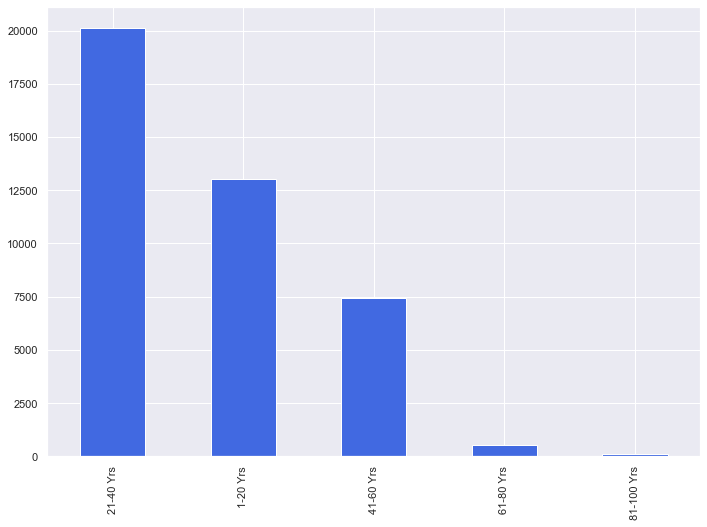

In [55]:
# Frequency Graph for Age

fig, ax = plt.subplots()
df['Age_Group'].value_counts().plot(ax=ax, kind='bar', color='royalblue')

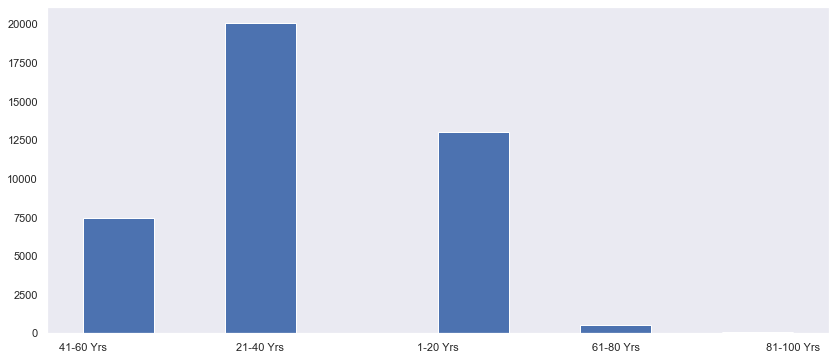

In [56]:
# Histogram For Age

df['Age_Group'].hist(figsize=[14,6],grid=False)

In [57]:
# Descriptive Analysis
print(df.describe())

                Age      Duration      Campaign   Passed_days  Prev_Contacts  \
count  41173.000000  41173.000000  41173.000000  41173.000000   41173.000000   
mean      40.023462    258.320671      2.567969    962.462148       0.173002   
std       10.420951    259.312867      2.770396    186.943652       0.494964   
min       17.000000      0.000000      1.000000      0.000000       0.000000   
25%       32.000000    102.000000      1.000000    999.000000       0.000000   
50%       38.000000    180.000000      2.000000    999.000000       0.000000   
75%       47.000000    319.000000      3.000000    999.000000       0.000000   
max       98.000000   4918.000000     56.000000    999.000000       7.000000   

       Emp_var_rate  cons_price_idx  cons_conf_idx  E3_Month_rate  \
count  41173.000000    41173.000000   41173.000000   41173.000000   
mean       0.082059       93.575770     -40.502448       3.621463   
std        1.570858        0.578831       4.627773       1.734387   
min

Correlation Matrix 



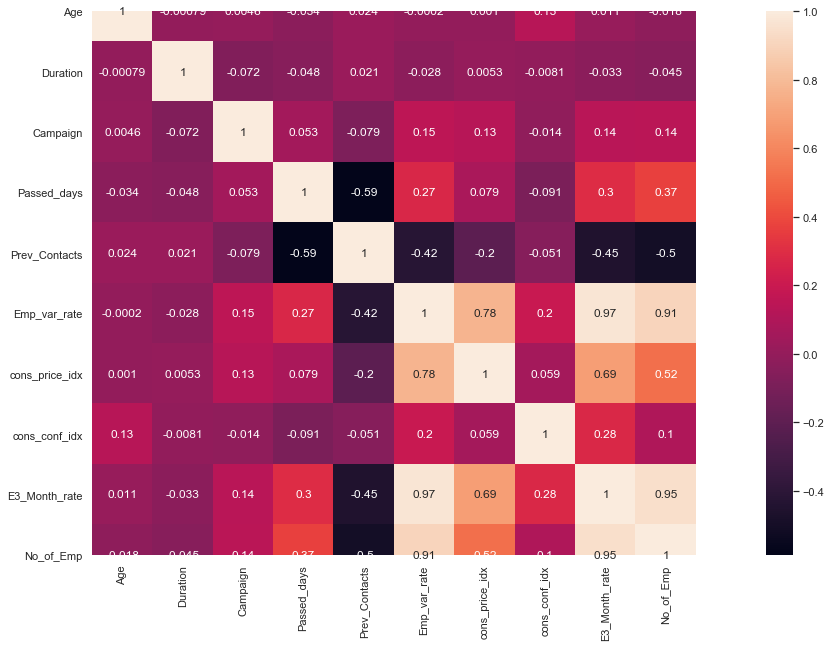

In [58]:
#Correlations of the dataset
#Heat map

print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

In [59]:
# Research Quetions:

#1.	How will age Group will be one of the factors used to find a pattern?
#2.	How much % of people are already undergone this marketing campaign?
#3.	How Education level performs major role to have enough knowledge when comes in under such survey.
#4.	The ratio of customers having various types of loan already such as Housing Loan or Personal Loan.
#5.	What is the outcome of the previous campaigns held in order to increase the product Subscription rate?
#6.	The Product subscription varying according to Marital status which influences Customers to buy the Bank Term Deposit.
#7.	How Various Job types at their levels affects customers to subscribe the Product.
#8.	How may times the same customer has been approached and what is the frequency of the same?
#9.	What can be the best Contact Medium which helps to attract customers to subscribe the Product?
#10.Overall Customer Product Subscription variation depending on all the factors provided.


Marital Status: Single, Married, Divorced, Unknown
Client who has Subscribed the Deposit Term: 1620 2531 476 12
Client who have not Subscribed the Deposit Term: 9944 22387 4135 68


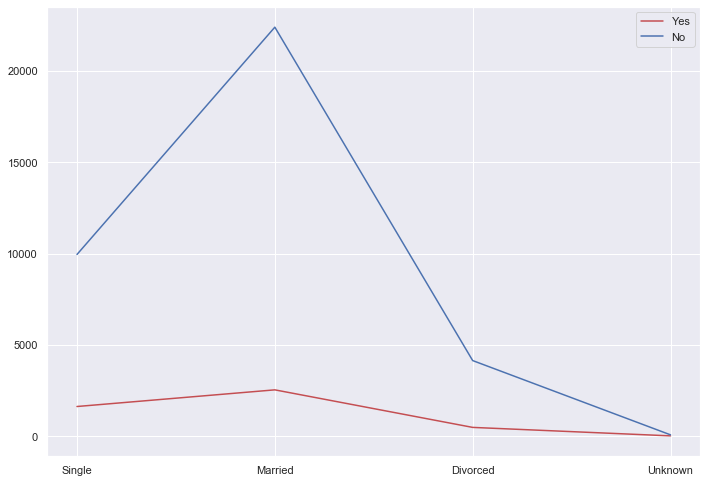

In [60]:
#1.	Ratio of the marital status of people who have subscribed the deposit.#

import matplotlib.pyplot as plt

Marital_Status1 = (df['Marital_Status'] == 'single') & (df['Client_Subscription'] == 'Yes')
MS1 = Marital_Status1.sum()
Marital_Status2 = (df['Marital_Status'] == 'married') & (df['Client_Subscription'] == 'Yes')
MS2 = Marital_Status2.sum()
Marital_Status3 = (df['Marital_Status'] == 'divorced') & (df['Client_Subscription'] == 'Yes')
MS3 = Marital_Status3.sum()
Marital_Status4 = (df['Marital_Status'] == 'unknown') & (df['Client_Subscription'] == 'Yes')
MS4 = Marital_Status4.sum()

Marital_Status1 = (df['Marital_Status'] == 'single') & (df['Client_Subscription'] == 'No')
MS5 = Marital_Status1.sum()
Marital_Status2 = (df['Marital_Status'] == 'married') & (df['Client_Subscription'] == 'No')
MS6 = Marital_Status2.sum()
Marital_Status3 = (df['Marital_Status'] == 'divorced') & (df['Client_Subscription'] == 'No')
MS7 = Marital_Status3.sum()
Marital_Status4 = (df['Marital_Status'] == 'unknown') & (df['Client_Subscription'] == 'No')
MS8 = Marital_Status4.sum()

print('Marital Status: Single, Married, Divorced, Unknown')
print('Client who has Subscribed the Deposit Term:', MS1,MS2,MS3,MS4)
print('Client who have not Subscribed the Deposit Term:', MS5,MS6,MS7,MS8)

x_values = ('Single','Married', 'Divorced', 'Unknown')
y_values = np.array([1620,2532,476,12])
y_values1 = np.array([9948,22396,4136,68])

# Adjust the line colors here
plt.plot(x_values, y_values, "r")  # Make line red
plt.plot(x_values, y_values1, "b") # Make line blue

plt.legend(['Yes', 'No'])
plt.show()

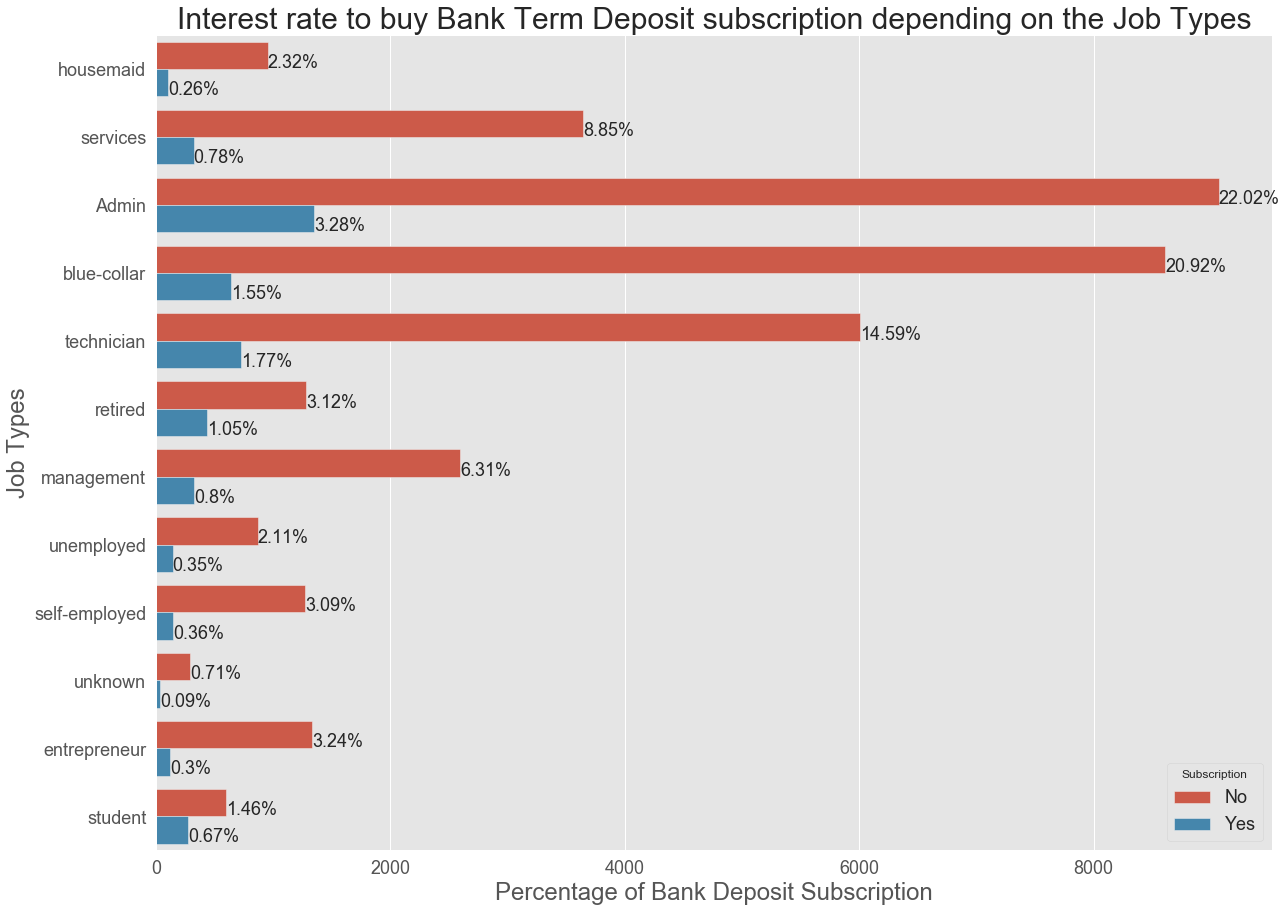

In [61]:
#2. The comparative ratio depending on the job status of people towards subscribing the bank term deposit.

plt.style.use('ggplot')
plt.figure(figsize = (20, 15))

ax = sns.countplot(y = "Job_Type", hue ="Client_Subscription", data = df)
plt.title('Interest rate to buy Bank Term Deposit subscription depending on the Job Types', fontsize = 30)
plt.xlabel('Percentage of Bank Deposit Subscription', fontsize = 24)
plt.ylabel('Job Types', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Subscription", loc = 'lower right')
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    ax.text(width + 0.3, y + 0.38, 
            str(
                round((width/total) * 100, 2)) 
                + '%',
            fontsize=18)

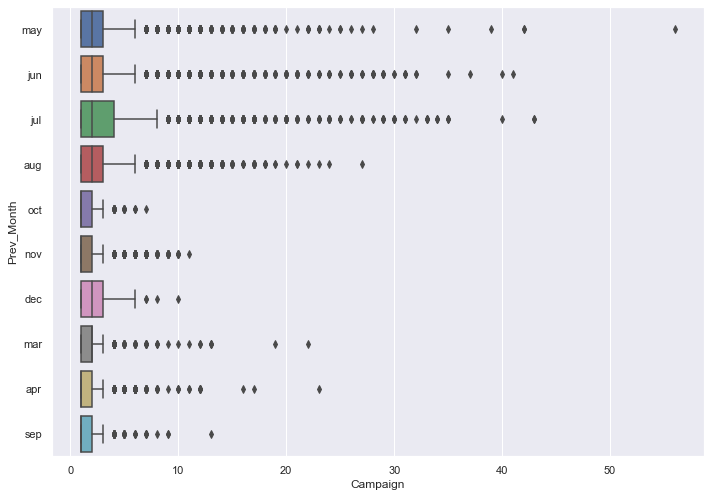

In [62]:
#3. Boxplot to see variation of campaign success rate by the months.
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Campaign", y="Prev_Month", data=df, linewidth=1.5)

In [63]:
#4. Clients Personal and House Loan Proportion

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

House_Loan_Yes = (df['Housing_Loan'].value_counts()['yes'])
House_Loan_No = (df['Housing_Loan'].value_counts()['no'])
House_Loan_Unknown = (df['Housing_Loan'].value_counts()['unknown'])
Pers_Loan_Yes = (df['Personal_Loan'].value_counts()['yes'])
Pers_Loan_No = (df['Personal_Loan'].value_counts()['no'])
Pers_Loan_Unknown = (df['Personal_Loan'].value_counts()['unknown'])

print('Loan Values: Yes, No, Unknown')
print(House_Loan_Yes,House_Loan_No,House_Loan_Unknown)
print(Pers_Loan_Yes,Pers_Loan_No,Pers_Loan_Unknown)

trace1 = go.Indicator(mode="gauge+number", value= House_Loan_Yes, domain={'row' : 1, 'column' : 1}, title={'text': "House Loan Yes"})
trace2 = go.Indicator(mode="gauge+number", value= House_Loan_No, domain={'row' : 1, 'column' : 2}, title={'text': "House Loan No"})
trace3 = go.Indicator(mode="gauge+number", value= House_Loan_Unknown, domain={'row' : 1, 'column' : 3}, title={'text': "House Loan Unknown"})
trace4 = go.Indicator(mode="gauge+number", value= Pers_Loan_Yes, domain={'row' : 2, 'column' : 1}, title={'text': "Personal Loan Yes"})
trace5 = go.Indicator(mode="gauge+number", value= Pers_Loan_No, domain={'row' : 2, 'column' : 2}, title={'text': "Personal Loan No"})
trace6 = go.Indicator(mode="gauge+number", value= Pers_Loan_Unknown, domain={'row' : 2, 'column' : 3}, title={'text': "Personal Loan Unknown"})

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"}, {"type": "domain"},{"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"},{"type": "domain"}]],
)
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)
fig.append_trace(trace3, row=1, col=3)
fig.append_trace(trace4, row=2, col=1)
fig.append_trace(trace5, row=2, col=2)
fig.append_trace(trace6, row=2, col=3)
fig.update_layout(height=600, width=1100, showlegend=True)

fig.show()  

Loan Values: Yes, No, Unknown
21568 18615 990
6247 33936 990


Values: Success, Failure, NonExistent
894 605 3140
479 3646 32409


(-1.100755300686684,
 1.100035966699366,
 -1.1057636551793109,
 1.1060956664309778)

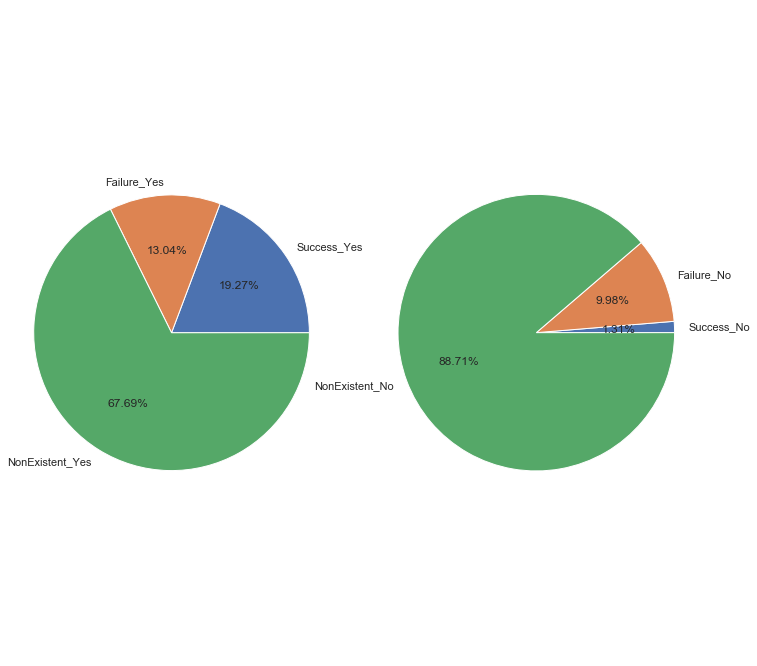

In [64]:
#5. how previous outcome of the campaigns held before affected towards subscribing deposit term.

Prev_Success_Yes = (df['Prev_Outcome'] == 'success') & (df['Client_Subscription'] == 'Yes')
PO1 = Prev_Success_Yes.sum()
Prev_failure_Yes = (df['Prev_Outcome'] == 'failure') & (df['Client_Subscription'] == 'Yes')
PO2 = Prev_failure_Yes.sum()
Prev_unknown_Yes = (df['Prev_Outcome'] == 'nonexistent') & (df['Client_Subscription'] == 'Yes')
PO3 = Prev_unknown_Yes.sum()
Prev_Success_No = (df['Prev_Outcome'] == 'success') & (df['Client_Subscription'] == 'No')
PO4 = Prev_Success_No.sum()
Prev_failure_No = (df['Prev_Outcome'] == 'failure') & (df['Client_Subscription'] == 'No')
PO5 = Prev_failure_No.sum()
Prev_unknown_No = (df['Prev_Outcome'] == 'nonexistent') & (df['Client_Subscription'] == 'No')
PO6 = Prev_unknown_No.sum()

print('Values: Success, Failure, NonExistent')
print(PO1,PO2,PO3)
print(PO4,PO5,PO6)

fig, (plt,plt1) = plt.subplots(1,2,figsize=(12,12)) 

my_labels_yes = ['Success_Yes','Failure_Yes','NonExistent_Yes']
my_data = [PO1,PO2,PO3]
plt.pie(my_data,labels=my_labels_yes,autopct='%1.2f%%')
plt.axis('equal')

my_labels_no = ['Success_No','Failure_No','NonExistent_No']
my_data_no = [PO4,PO5,PO6]
plt1.pie(my_data_no,labels=my_labels_no,autopct='%1.2f%%')
plt1.axis('equal')

In [65]:
#6. How Educaton levels plays important role to subscribe the Bank Term Deposit ratio.

Edu_Level1 = (df['Education_Level'] == 'unknown') & (df['Client_Subscription'] == 'Yes')
EL1 = Edu_Level1.sum()
Edu_Level2  = (df['Education_Level'] == 'professional.course') & (df['Client_Subscription'] == 'Yes')
EL2 = Edu_Level2.sum()
Edu_Level3 = (df['Education_Level'] == 'high.school') & (df['Client_Subscription'] == 'Yes')
EL3 = Edu_Level3.sum()
Edu_Level4 = (df['Education_Level'] == 'university.degree') & (df['Client_Subscription'] == 'Yes')
EL4 = Edu_Level4.sum()
Edu_Level5 = (df['Education_Level'] == 'Primary_School') & (df['Client_Subscription'] == 'Yes')
EL5 = Edu_Level5.sum()

print('Education Levels are: Unknown , Professional , High_School , University , Primary')
print('Bank Term Deposit Subscription Yes:' , EL1,EL2,EL3,EL4,EL5)

Edu_Level6 = (df['Education_Level'] == 'unknown') & (df['Client_Subscription'] == 'No')
EL6 = Edu_Level6.sum()
Edu_Level7 = (df['Education_Level'] == 'professional.course') & (df['Client_Subscription'] == 'No')
EL7 = Edu_Level7.sum()
Edu_Level8 = (df['Education_Level'] == 'high.school') & (df['Client_Subscription'] == 'No')
EL8 = Edu_Level8.sum()
Edu_Level9 = (df['Education_Level'] == 'university.degree') & (df['Client_Subscription'] == 'No')
EL9 = Edu_Level9.sum()
Edu_Level10 = (df['Education_Level'] == 'Primary_School') & (df['Client_Subscription'] == 'No')
EL10 = Edu_Level10.sum()
print('Bank Term Deposit Subscription No:' , EL6,EL7,EL8,EL9,EL10)

import plotly.express as px
import pandas as pd

stages = ["Unknown","Professional", "High_School", "University", "Primary_School",]
df_mtl = pd.DataFrame(dict(number=[1089,1670,1031,595,251], stage=stages)) 
df_mtl['Client_Subscription'] = 'Yes'
df_toronto = pd.DataFrame(dict(number=[11424,10498,8484,4648,1480], stage=stages))  
df_toronto['Client_Subscription'] = 'No'
df1 = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df1, x='number', y='stage', color='Client_Subscription')
fig.show()

Education Levels are: Unknown , Professional , High_School , University , Primary
Bank Term Deposit Subscription Yes: 251 595 1031 1669 1089
Bank Term Deposit Subscription No: 1479 4645 8481 10495 11420


In [66]:
#7. How Contact medium is one of teh way to draw customers attention in order to raise subscription rate.

import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add table data
table_data = [['Contact_Type', 'Cellular', 'Telephone'],
              ['Yes', 2130, 377],
              ['No',12402,6667]]
             
fig = ff.create_table(table_data, height_constant=60)
# Add graph data
teams = ['Cellular', 'Telephone']
         
GFPG = [2130, 377]
GAPG = [12402,6667]

# Make traces for graph
trace1 = go.Bar(x=teams, y=GFPG, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='Clients Subscription Yes')
trace2 = go.Bar(x=teams, y=GAPG, xaxis='x2', yaxis='y2',
                marker=dict(color='#20F216'),
                name='Clients Subscription No')

# Add trace data to figure
fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Contact Type affecting to draw clients attention to subscribe Bank Term deposit'})
fig.layout.update({'height':1000})

fig.show()


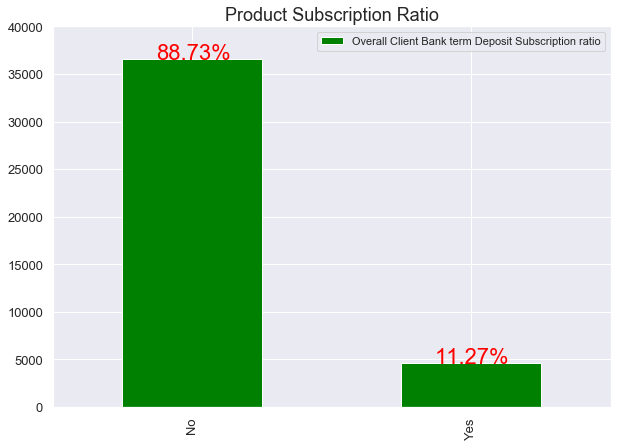

In [67]:
#8. Overall Client Subscription rate towards Bak Term Deposit by considering all the features of the dataset.

 
ax = df['Client_Subscription'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Product Subscription Ratio", fontsize=18)
ax.set_yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])
ax.legend(labels=['Overall Client Bank term Deposit Subscription ratio'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='Red')

In [68]:
# Concusion is that Product Subscription Success count is 11.27% where as Failure count is 88.73% among the customers who has been undergone this Survey.

In [69]:
#Thank You!